A very simple Linear_regression class was built which finds the optimum  weight vector Θ by batch gradient descent and compared to Sk-learen LinearRegression.

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import linregress
from sklearn.model_selection import train_test_split

class Linear_regression():

    def __init__(self, X, y, alpha, lamb, num_iter):
        self.X = X
        self.y = y
        self.alpha = alpha
        self.lamb = lamb
        self.loss_vs_iter = {}
        self.num_iter = num_iter
    def gradient_descent(self):
        '''        
        1. add a bias feature which is always equal to 1.
        2. set all thetas as 0 (number of theta is the number of features + 1 (bias))
        3. compute the gradient of loss function (regulisation is applied when lamb is non-zero).
        4. update all thetas (simultaneously otherwise it will affect the gradient.)
        5. repeat until a certain number of iteration or until the gradient reach almost 0.
        '''

        #1
        self.X = np.concatenate((np.ones((self.X.shape[0], 1)), self.X), axis = 1)
        #2 
        thetas = np.zeros((1, self.X.shape[1]))    
        #3
        for step in range(self.num_iter):
            # number of training example
            M = self.X.shape[0] 
            #compute the loss every 500 step 
            if step %500 == 0:
                loss =  0.5/M * (np.sum((np.dot(thetas, self.X.T) - self.y)**2) + self.lamb * np.sum(thetas**2))
                self.loss_vs_iter[step] = loss
            #3 
            gradient = (1/M) * np.dot((np.dot(thetas, self.X.T) - self.y), self.X)
            #4
            thetas = thetas - self.alpha * (gradient + (self.lamb/M) * np.sum(thetas))
        return (thetas, self.loss_vs_iter)

Consider the following case with only one feature. The algorithm is confirmed to be working properly as the loss converges wrt to the number of iteration.


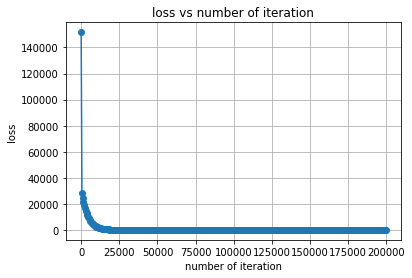

In [39]:
    # create a fairly linear dataset
    X = np.array([i for i in range(100)]).reshape(100,1)
    noise = 5* np.random.normal(0,1,X.shape) + 500
    y = (X + noise).flatten()
        
    C = Linear_regression(X, y, 0.0005, 0, 200000)
    thetas, losses = C.gradient_descent()
    # plot loss vs number of iteration
    plt.figure()
    plt.title("loss vs number of iteration")
    plt.ylabel("loss")
    plt.xlabel("number of iteration")
    plt.grid()
    plt.plot(list(losses.keys()), list(losses.values()), marker = "o")

Lets compare my result to the Sk-learn model.

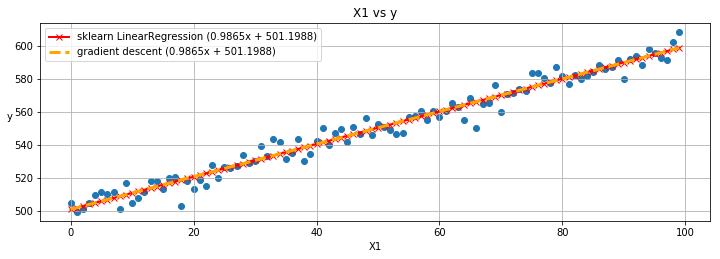

In [40]:
clf = LinearRegression()
clf = clf.fit(X, y)

m, c = clf.coef_[0], clf.intercept_

plt.figure(figsize = (12,8))
ax1 = plt.subplot(211)
ax1.set_title("X1 vs y")
ax1.set_xlabel("X1")
ax1.set_ylabel("y").set_rotation(0)
ax1.scatter(X.flatten(), y)

ax1.plot(X, list(map(lambda x: m*x + c, X)), label = "sklearn LinearRegression ({0}x + {1})".format(round(m,4), round(c,4)), marker = "x", color = "r", linewidth = 2) 
ax1.plot(X, list(map(lambda x: thetas[0][1]*x + thetas[0][0], X)), label = "gradient descent ({0}x + {1})".format(round(thetas[0][1], 4),  round(thetas[0][0],4)), linestyle = "--", color = "orange", linewidth = 3)   
ax1.legend()
ax1.grid()

The weight θ computed are identical. Now let's consider a situation with 2 features and compare the resulting θ computed.

In [41]:
X1 = np.array([i for i in range(100)]).reshape(100,1)
X2 = np.array([i*2 for i in range(100)]).reshape(100,1)
X = np.concatenate((X1,X2), axis = 1)   

noise = 5* np.random.normal(0,1,X1.shape) + 500
y = (X1 + noise).flatten()

C = Linear_regression(X, y, 0.0001, 0, 500000)
thetas, losses = C.gradient_descent()
clf = LinearRegression()
clf = clf.fit(X, y)

m, c = clf.coef_, clf.intercept_

print ("thetas: ")
print (*thetas)
print ("sk-learn: ")
print (c, m)

thetas: 
[  5.01368979e+02   1.96036966e-01   3.92073932e-01]
sk-learn: 
501.370527434 [ 0.1960323  0.3920646]


Again, result is pretty similar.